# Handling Outliers

***Extreme values are outliers***

In [1]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mdaza\AppData\Local\Temp\ipykernel_14504\3572224656.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pandas


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df = sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='total_bill'>

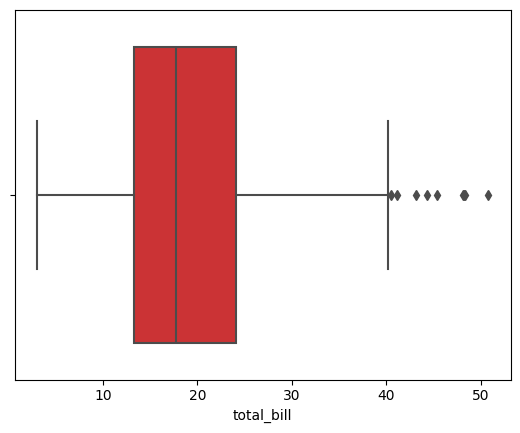

In [7]:
sns.boxplot(x='total_bill', data=df, palette='Set1')

<Axes: xlabel='tip'>

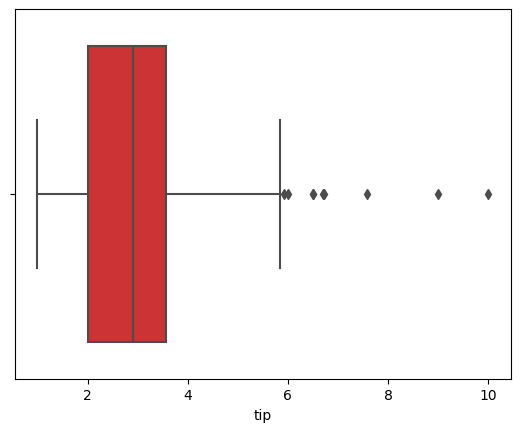

In [8]:
sns.boxplot(x='tip', data=df, palette='Set1')

<Axes: xlabel='size'>

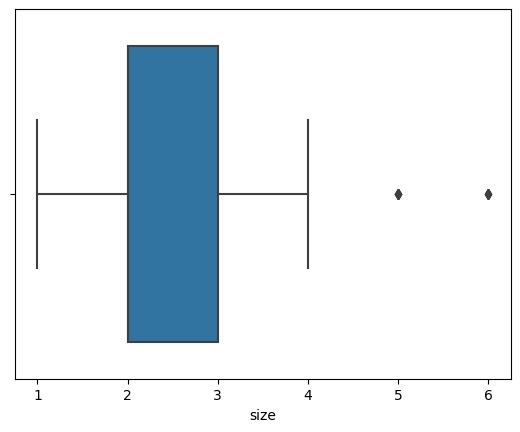

In [9]:
sns.boxplot(x='size' , data=df  )

C:\Users\mdaza\AppData\Local\Temp\ipykernel_14504\656286101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])
c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


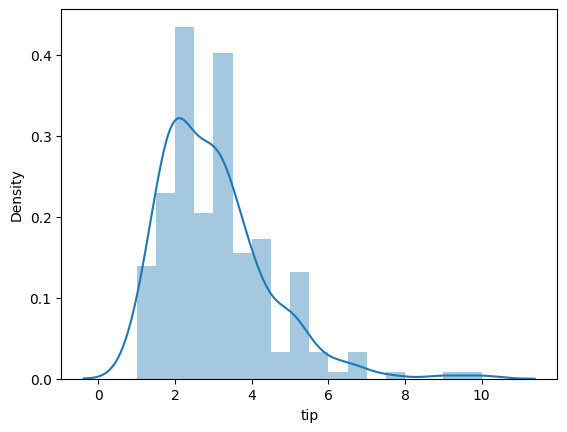

In [10]:
import matplotlib.pyplot as plt
sns.distplot(df['tip'])
plt.show()

# How to Remove Outliers using IQR 

In [11]:
df # Dataset with all the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill'>

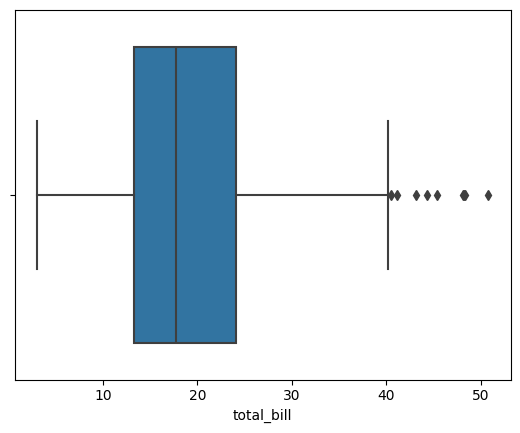

In [12]:
sns.boxplot(x='total_bill' , data=df)

In [13]:
df.shape

(244, 7)

In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


***IQR = Q3 - Q2***

In [15]:
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)

In [16]:
print(Q1)
print(Q3)

13.3475
24.127499999999998


In [17]:
IQR = Q3 - Q1
print(IQR)

10.779999999999998


# Min = Q1 - (1.5 * IQR)

# Max = Q3 + (1.5 * IQR)

In [18]:
# Max = Q3 + (1.5 * IQR)

min_range = Q1 - (1.5 * IQR)

max_range = Q3 + (1.5 * IQR)


print(min_range)
print(max_range)

-2.8224999999999945
40.29749999999999


<Figure size 640x480 with 0 Axes>

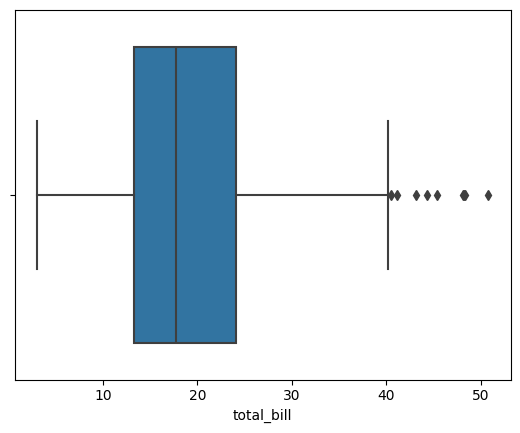

<Figure size 640x480 with 0 Axes>

In [19]:
sns.boxplot(x='total_bill' , data=df)
plt.figure()

In [20]:
# Remove Outliers

s = df[df['total_bill'] <= max_range]

In [21]:
s.shape

(235, 7)

<Axes: xlabel='total_bill'>

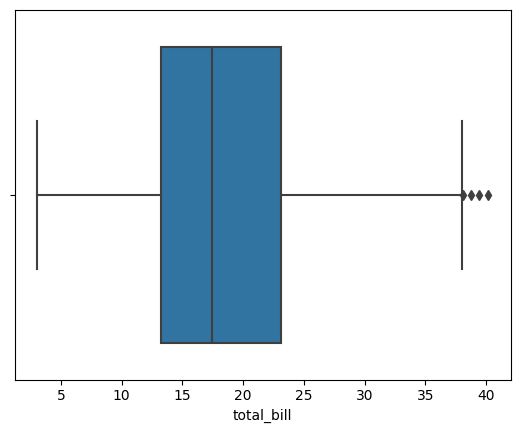

In [22]:
sns.boxplot(x='total_bill' , data = s)

# How to Remove Outliers using Z-Score

In [24]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
df['total_bill'].isna().sum()

0

In [30]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='total_bill'>

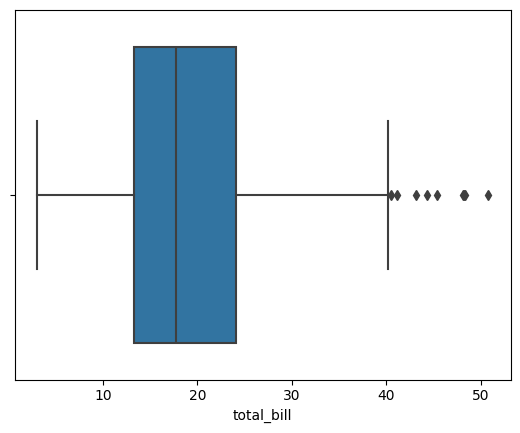

In [29]:
sns.boxplot(x='total_bill' , data=df)

In [36]:
min_range1 = df['total_bill'].mean() - (3*df['total_bill'].std())

In [39]:
max_range1 = df['total_bill'].mean() + (3*df['total_bill'].std())

In [40]:
print(min_range1)
print(max_range1)

-6.921293241619747
46.49317848752139


In [42]:
new_data = df[df['total_bill']<=max_range1]
new_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill'>

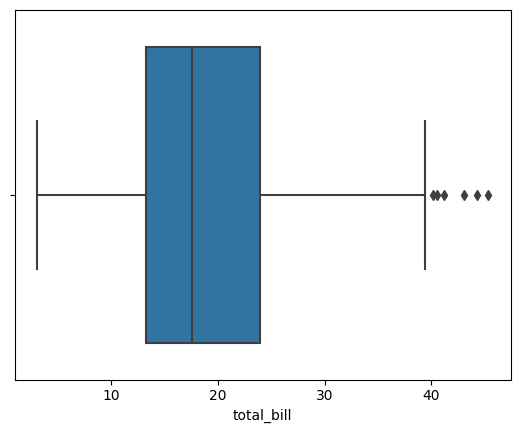

In [43]:
sns.boxplot(x='total_bill' , data=new_data)

<Axes: xlabel='tip'>

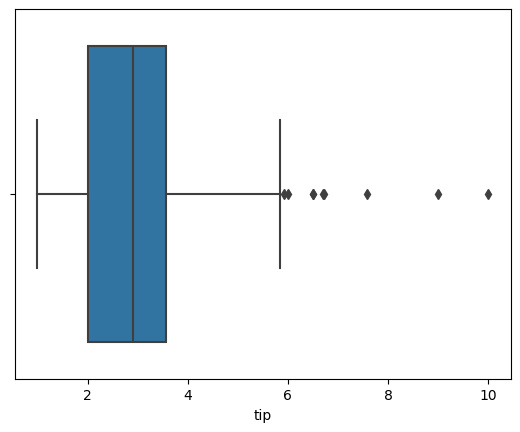

In [45]:
sns.boxplot(x='tip' , data=df)

In [47]:
z_score = df['tip'] - df['tip'].mean() / df['tip'].std()
z_score

0     -1.156953
1     -0.506953
2      1.333047
3      1.143047
4      1.443047
         ...   
239    3.753047
240   -0.166953
241   -0.166953
242   -0.416953
243    0.833047
Name: tip, Length: 244, dtype: float64

In [51]:
df['z_score'] = z_score

df

,total_bill,tip,sex,smoker,day,time,size,z_score
0,16.99,1.01,Female,No,Sun,Dinner,2,-1.156953
1,10.34,1.66,Male,No,Sun,Dinner,3,-0.506953
2,21.01,3.50,Male,No,Sun,Dinner,3,1.333047
3,23.68,3.31,Male,No,Sun,Dinner,2,1.143047
4,24.59,3.61,Female,No,Sun,Dinner,4,1.443047
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.753047
240,27.18,2.00,Female,Yes,Sat,Dinner,2,-0.166953
241,22.67,2.00,Male,Yes,Sat,Dinner,2,-0.166953
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.416953


In [53]:
new_tip = df[df['z_score'] <= 3]

<Axes: xlabel='tip'>

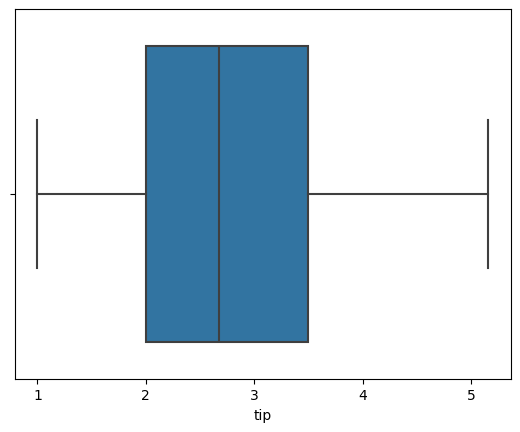

In [55]:
sns.boxplot(x='tip' , data=new_tip)

In [57]:
df.shape

(244, 8)

<Axes: xlabel='tip'>

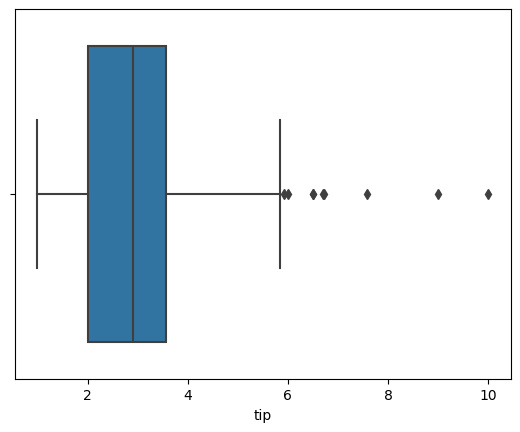

In [58]:
sns.boxplot(x='tip' , data=df)

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


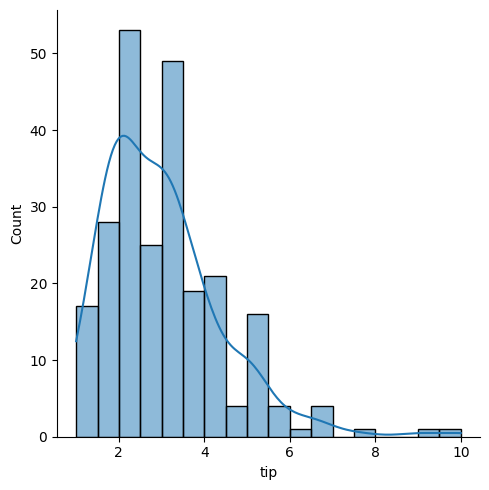

In [63]:
import matplotlib.pyplot as plt
sns.displot(df['tip'] , kde = True)
plt.show()

In [56]:
new_tip.shape

(230, 8)

<Axes: xlabel='tip'>

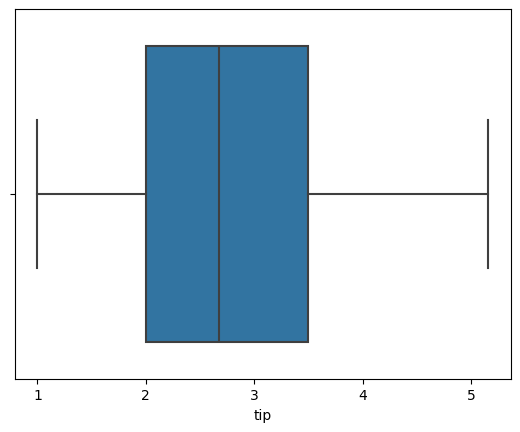

In [64]:
sns.boxplot(x='tip' , data=new_tip)

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


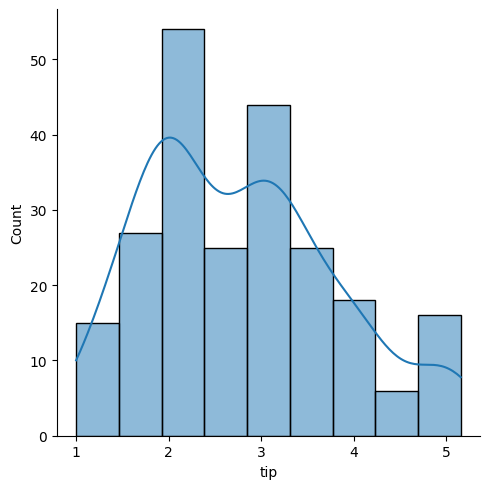

In [68]:
import matplotlib.pyplot as plt
sns.displot( new_tip['tip'] , kde = True)
plt.show()